<a href="https://colab.research.google.com/github/hariprasath1708/A-Study-On-Agriculture-Commodities-Price-Prediction-and-Forecasting/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from google.colab import files
upload=files.upload()

Saving Monthly_data_cmo.csv to Monthly_data_cmo (1).csv


In [4]:
df=pd.read_csv('Monthly_data_cmo.csv')
df

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra
...,...,...,...,...,...,...,...,...,...,...,...
62424,Shrigonda,GRAM,2016,November,586,5700,6367,6200,2016-11,Ahmadnagar,Maharashtra
62425,Shrigonda,GREEN GRAM,2016,November,2,5000,5000,5000,2016-11,Ahmadnagar,Maharashtra
62426,Shrigonda,BLACK GRAM,2016,November,46,4700,6933,6400,2016-11,Ahmadnagar,Maharashtra
62427,Shrigonda,SOYBEAN,2016,November,166,2583,2708,2633,2016-11,Ahmadnagar,Maharashtra


In [5]:
df.isnull().sum()

APMC               0
Commodity          0
Year               0
Month              0
arrivals_in_qtl    0
min_price          0
max_price          0
modal_price        0
date               0
district_name      0
state_name         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   APMC             62429 non-null  object
 1   Commodity        62429 non-null  object
 2   Year             62429 non-null  int64 
 3   Month            62429 non-null  object
 4   arrivals_in_qtl  62429 non-null  int64 
 5   min_price        62429 non-null  int64 
 6   max_price        62429 non-null  int64 
 7   modal_price      62429 non-null  int64 
 8   date             62429 non-null  object
 9   district_name    62429 non-null  object
 10  state_name       62429 non-null  object
dtypes: int64(5), object(6)
memory usage: 5.2+ MB


In [7]:
df.shape

(62429, 11)

In [8]:
df.date=pd.to_datetime(df.date)

In [9]:
df_num=df.select_dtypes(include=['int64','float64'])
df_num

,Year,arrivals_in_qtl,min_price,max_price,modal_price
0,2015,79,1406,1538,1463
1,2016,106,1788,1925,1875
2,2015,1253,1572,1890,1731
3,2016,387,1750,2220,1999
4,2015,3825,1600,2200,1900
...,...,...,...,...,...
62424,2016,586,5700,6367,6200
62425,2016,2,5000,5000,5000
62426,2016,46,4700,6933,6400
62427,2016,166,2583,2708,2633


In [10]:
df_cat=df.select_dtypes(include=object)
df_cat

,APMC,Commodity,Month,district_name,state_name
0,Ahmednagar,Bajri,April,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,April,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),April,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),April,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),April,Ahmadnagar,Maharashtra
...,...,...,...,...,...
62424,Shrigonda,GRAM,November,Ahmadnagar,Maharashtra
62425,Shrigonda,GREEN GRAM,November,Ahmadnagar,Maharashtra
62426,Shrigonda,BLACK GRAM,November,Ahmadnagar,Maharashtra
62427,Shrigonda,SOYBEAN,November,Ahmadnagar,Maharashtra


In [11]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
a=mn.fit_transform(df_num)
df_num_mn=pd.DataFrame(a,columns=df_num.columns)
df_num_mn

,Year,arrivals_in_qtl,min_price,max_price,modal_price
0,0.5,5.378372e-05,0.000446,0.000961,0.010278
1,1.0,7.240116e-05,0.000567,0.001203,0.013172
2,0.5,8.632976e-04,0.000499,0.001181,0.012161
3,1.0,2.661605e-04,0.000555,0.001387,0.014043
4,0.5,2.636781e-03,0.000507,0.001375,0.013348
...,...,...,...,...,...
62424,1.0,4.033779e-04,0.001808,0.003979,0.043556
62425,1.0,6.895349e-07,0.001586,0.003125,0.035126
62426,1.0,3.102907e-05,0.001491,0.004333,0.044962
62427,1.0,1.137733e-04,0.000819,0.001692,0.018497


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_cat['APMC']=le.fit_transform(df_cat['APMC'])
df_cat['Commodity']=le.fit_transform(df_cat['Commodity'])
df_cat['Month']=le.fit_transform(df_cat['Month'])
df_cat['district_name']=le.fit_transform(df_cat['district_name'])
df_cat['state_name']=le.fit_transform(df_cat['state_name'])
df_cat

,APMC,Commodity,Month,district_name,state_name
0,4,24,0,0,0
1,4,24,0,0,0
2,4,348,0,0,0
3,4,348,0,0,0
4,4,310,0,0,0
...,...,...,...,...,...
62424,298,114,9,0,0
62425,298,117,9,0,0
62426,298,19,9,0,0
62427,298,287,9,0,0


In [13]:
df_pred=pd.concat([df_cat,df_num_mn],axis=1)
df_pred

,APMC,Commodity,Month,district_name,state_name,Year,arrivals_in_qtl,min_price,max_price,modal_price
0,4,24,0,0,0,0.5,5.378372e-05,0.000446,0.000961,0.010278
1,4,24,0,0,0,1.0,7.240116e-05,0.000567,0.001203,0.013172
2,4,348,0,0,0,0.5,8.632976e-04,0.000499,0.001181,0.012161
3,4,348,0,0,0,1.0,2.661605e-04,0.000555,0.001387,0.014043
4,4,310,0,0,0,0.5,2.636781e-03,0.000507,0.001375,0.013348
...,...,...,...,...,...,...,...,...,...,...
62424,298,114,9,0,0,1.0,4.033779e-04,0.001808,0.003979,0.043556
62425,298,117,9,0,0,1.0,6.895349e-07,0.001586,0.003125,0.035126
62426,298,19,9,0,0,1.0,3.102907e-05,0.001491,0.004333,0.044962
62427,298,287,9,0,0,1.0,1.137733e-04,0.000819,0.001692,0.018497


In [14]:
x=df_pred.iloc[:,:9]
x

,APMC,Commodity,Month,district_name,state_name,Year,arrivals_in_qtl,min_price,max_price
0,4,24,0,0,0,0.5,5.378372e-05,0.000446,0.000961
1,4,24,0,0,0,1.0,7.240116e-05,0.000567,0.001203
2,4,348,0,0,0,0.5,8.632976e-04,0.000499,0.001181
3,4,348,0,0,0,1.0,2.661605e-04,0.000555,0.001387
4,4,310,0,0,0,0.5,2.636781e-03,0.000507,0.001375
...,...,...,...,...,...,...,...,...,...
62424,298,114,9,0,0,1.0,4.033779e-04,0.001808,0.003979
62425,298,117,9,0,0,1.0,6.895349e-07,0.001586,0.003125
62426,298,19,9,0,0,1.0,3.102907e-05,0.001491,0.004333
62427,298,287,9,0,0,1.0,1.137733e-04,0.000819,0.001692


In [15]:
y=df_pred.iloc[:,[-1]]
y

,modal_price
0,0.010278
1,0.013172
2,0.012161
3,0.014043
4,0.013348
...,...
62424,0.043556
62425,0.035126
62426,0.044962
62427,0.018497


In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
import statsmodels.api as sm
MLR_model1=sm.OLS(y_train,x_train).fit()
print(MLR_model1.summary())

                                 OLS Regression Results                                
Dep. Variable:            modal_price   R-squared (uncentered):                   0.589
Model:                            OLS   Adj. R-squared (uncentered):              0.589
Method:                 Least Squares   F-statistic:                              8931.
Date:                Mon, 20 Nov 2023   Prob (F-statistic):                        0.00
Time:                        18:19:44   Log-Likelihood:                      1.1932e+05
No. Observations:               49943   AIC:                                 -2.386e+05
Df Residuals:                   49935   BIC:                                 -2.386e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [20]:
y_test_pred=MLR_model1.predict(x_test)
y_test_pred.count()

12486

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test['modal_price'],y_pred=y_test_pred)

0.00030791832919135345

In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test['modal_price'],y_pred=y_test_pred)

0.01047669321918163

In [23]:
from sklearn.metrics import r2_score
r2_score (y_true=y_test['modal_price'],y_pred=y_test_pred)

0.4613516045668927

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [30]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(criterion='squared_error',max_depth=5,min_samples_split=2,min_samples_leaf=1)
dtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [31]:
y_pred1=dtree.predict(x_test)
y_pred1

array([0.01067511, 0.0554639 , 0.01067511, ..., 0.01067511, 0.0264563 ,
       0.04607985])

In [32]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test['modal_price'],y_pred=y_pred1)

0.00010406276425445656

In [33]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test['modal_price'],y_pred=y_pred1)

0.002545141502379849

In [34]:
from sklearn.metrics import r2_score
r2_score (y_true=y_test['modal_price'],y_pred=y_pred1)

0.8468998883327432

In [35]:
from sklearn.ensemble import RandomForestRegressor
classifier=RandomForestRegressor(n_estimators=500,criterion='squared_error')
classifier.fit(x_train, y_train)

<ipython-input-35-e17f82802278>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)


RandomForestRegressor(n_estimators=500)

In [47]:
<ipython-input-81-b817e8161834>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected.
please change the shape of y to (n_samples,), for example using ravel()
  classifier.fit(x_train,y_train)

SyntaxError: ignored

In [39]:
y_pred2=classifier.predict(x_test)
y_pred2

array([0.01123418, 0.0588663 , 0.01257145, ..., 0.01060514, 0.02450728,
       0.04776814])

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test ['modal_price'],y_pred=y_pred2)

8.029054328388521e-05

In [48]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test['modal_price'],y_pred=y_pred2)

0.000766296016952352

In [49]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test ['modal_price'],y_pred=y_pred2)

0.8818742589565498

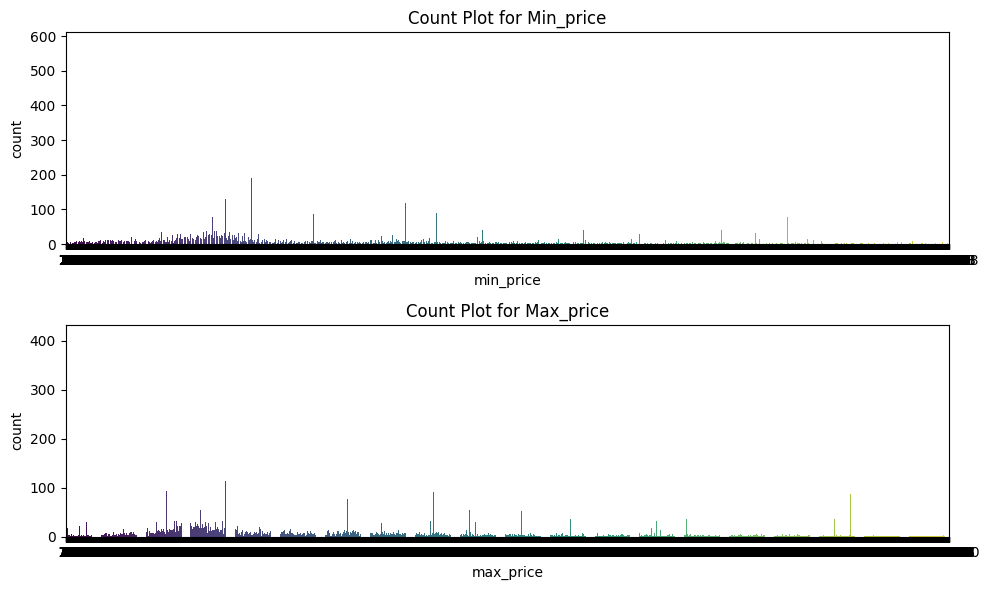

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Count plot for 'Min_price'
plt.subplot(2, 1, 1)
sns.countplot (x='min_price', data=df, palette='viridis')
plt.title('Count Plot for Min_price')

# Count plot for 'Max_price'
plt.subplot(2, 1, 2)
sns.countplot (x='max_price', data=df, palette='viridis')
plt.title('Count Plot for Max_price')
plt.tight_layout()
plt.show()

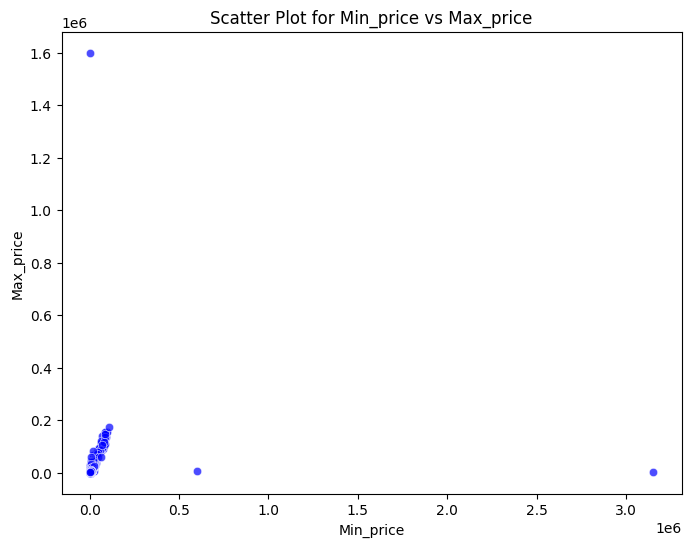

In [53]:
plt.figure(figsize=(8, 6))

sns.scatterplot (x='min_price', y='max_price', data=df, color='blue', alpha=0.7)
plt.title('Scatter Plot for Min_price vs Max_price')
plt.xlabel('Min_price')
plt.ylabel('Max_price')

plt.show()

In [57]:
# Creating a crosstab
cross_tab= pd.crosstab(df['APMC'], df['Commodity'])

# Displaying the crosstab
print(cross_tab)

Commodity      AMBAT CHUKA  AMLA  APPLE  ARVI  AWALA  Amba Koy  Ambat Chuka  \
APMC                                                                          
Aamgaon                  0     0      0     0      0         0            0   
Aarni                    0     0      0     0      0         0            0   
Achalpur                 0     0      0     0      0         0            0   
Aheri                    0     0      0     0      0         0            0   
Ahmednagar               0     0      0     0      0         0            0   
...                    ...   ...    ...   ...    ...       ...          ...   
Washim-Ansing            0     0      0     0      0         0            0   
Yawal                    0     0      0     0      0         0            0   
Yeola                    0     0      0     0      0         0            0   
Yeotmal                  0     0      0     0      0         0            0   
Zarijamini               0     0      0     0      0

<ipython-input-58-0472b75faeae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


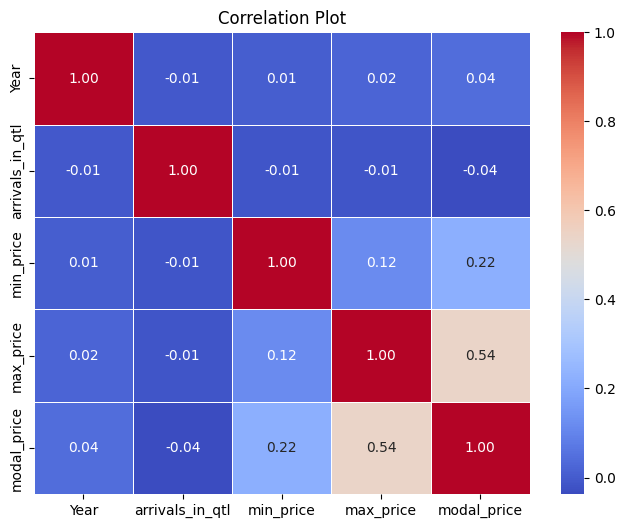

In [58]:
correlation_matrix = df.corr()

 # Creating a correlation plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot')
plt.show()

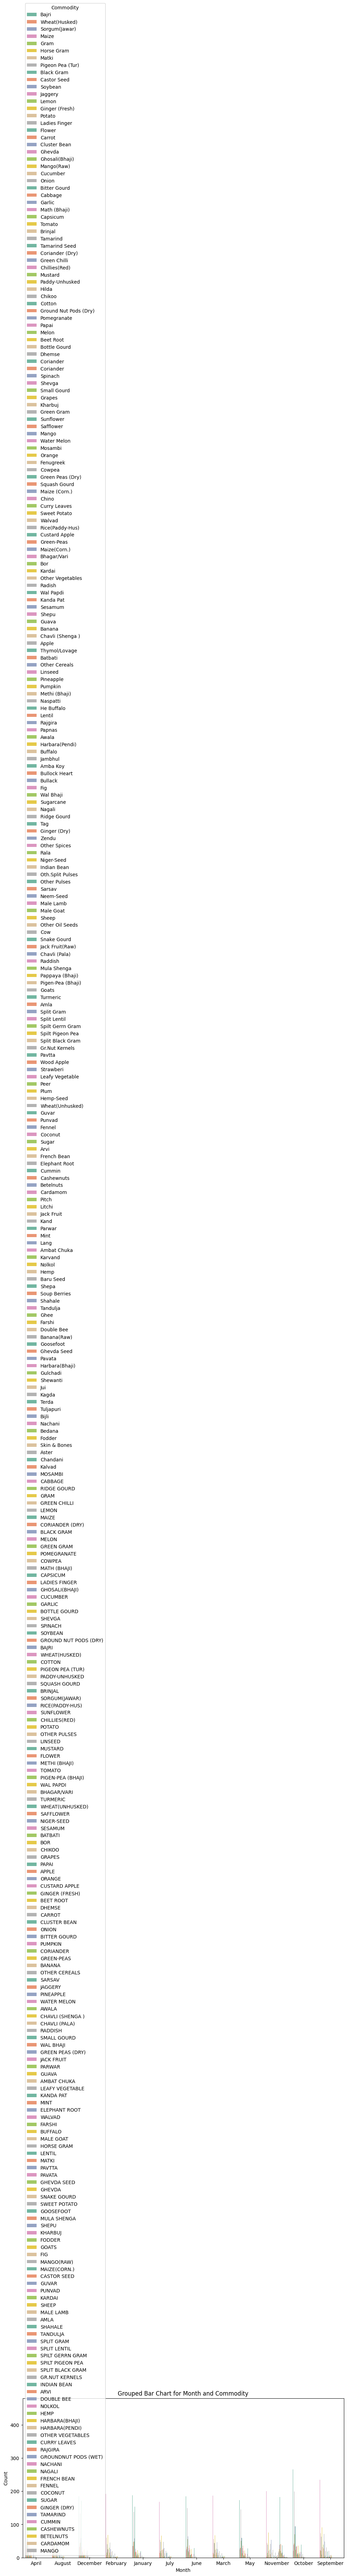

In [59]:
plt.figure(figsize=(12,6))

sns.countplot(x='Month', hue='Commodity', data=df, palette='Set2', dodge=True)
plt.title('Grouped Bar Chart for Month and Commodity')
plt.ylabel('Count')
plt.show()